In [1]:
%pylab inline 
from pymc3 import * 

Populating the interactive namespace from numpy and matplotlib


[ 1.          0.9         0.8         0.7         0.59999999  0.49999999
  0.39999999  0.29999999  0.19999999  0.1       ]
[ 1.          0.9         0.8         0.7         0.59999999  0.49999999
  0.39999999  0.29999999  0.19999999  0.1       ]
{'p_simplex': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])}
 [-----------------100%-----------------] 20000 of 20000 complete in 4.0 sec

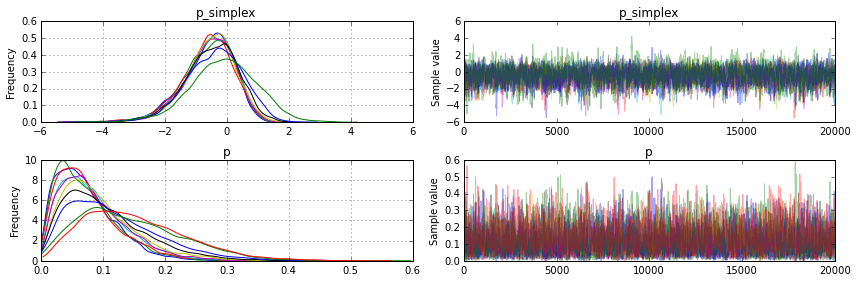

In [3]:
with Model() as model:
    
    a = np.array([1,1,1,1,1])*10
    k=10
    a = np.ones(k)*3
    #p = Dirichlet('p', a, shape=k, transform=simplexarrtransform)
    p = Dirichlet('p', a, shape=k)
    #c = Categorical('c', p, observed=[0,0,1,1,0,2])


    print (model.test_point)
    step = Metropolis(model.vars)
    trace = sample(20000, step)
    
a = traceplot(trace)

In [5]:
summary(trace)


p_simplex:
 
  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.610           0.840            0.036            [-2.337, 0.803]
  -0.625           0.847            0.033            [-2.252, 0.915]
  -0.635           0.862            0.041            [-2.428, 0.828]
  -0.553           0.839            0.035            [-2.149, 1.030]
  -0.579           0.839            0.033            [-2.151, 0.965]
  -0.526           0.810            0.028            [-2.098, 1.055]
  -0.492           0.869            0.033            [-2.172, 1.187]
  -0.404           0.935            0.041            [-2.147, 1.336]
  -0.097           1.091            0.056            [-2.213, 2.039]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -2.512         -1.089         -0.493         -0.015         0.

{'p_simplexarr': array([ 0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1])}
 [-----------------100%-----------------] 20000 of 20000 complete in 2.6 sec

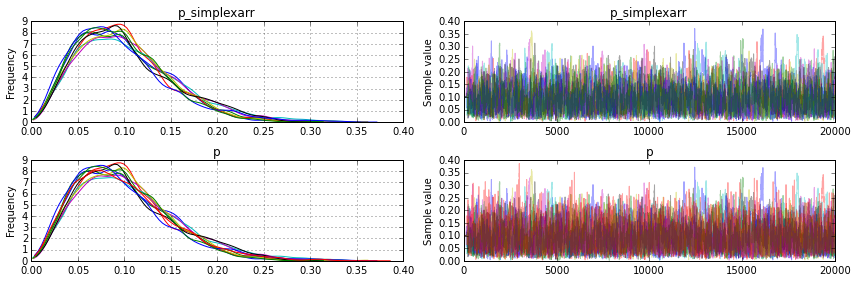

In [4]:
with Model() as model:
    
    a = np.array([1,1,1,1,1])*10
    k=10
    a = np.ones(k)*3
    p = Dirichlet('p', a, shape=k, transform=simplexarrtransform)
    #c = Categorical('c', p, observed=[0,0,1,1,0,2])


    print (model.test_point)
    step = Metropolis(model.vars)
    trace2 = sample(20000, step)
    
a = traceplot(trace2)

In [6]:
summary(trace2)


p_simplexarr:
 
  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.098            0.050            0.003            [0.016, 0.190]
  0.097            0.051            0.003            [0.012, 0.193]
  0.099            0.051            0.003            [0.012, 0.196]
  0.107            0.057            0.004            [0.014, 0.220]
  0.105            0.054            0.003            [0.016, 0.210]
  0.100            0.050            0.003            [0.015, 0.193]
  0.102            0.053            0.003            [0.019, 0.213]
  0.096            0.055            0.003            [0.010, 0.207]
  0.096            0.047            0.002            [0.012, 0.185]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.023          0.060          0.091          0.130          0.206
  

In [7]:
trace[-1]

{'p': array([ 0.,  0.,  1.]),
 'p_simplex': array([ -3.87234445e+23,  -1.38063818e+22])}

In [ ]:


with Model() as model:
    k=3
    
    a = np.ones(k)*.5
    
    p = Dirichlet('p', a, shape=k, testval='mean')
    #c = Categorical('c', p, observed=[0,0,1,1,0,2])

    start = find_MAP()
    step = NUTS(model.vars, scaling=guess_scaling(start)*10)
    trace = sample(5000, step, start=start)
    
a = traceplot(trace)

In [ ]:
guess_scaling(trace[-1], model=model)

In [ ]:
step.Hbar

In [ ]:
start

In [ ]:
np.exp(-.097)

In [ ]:
with model:
    dlp = model.dlogp()
    
dlp(model.test_point)

In [ ]:
model.test_point

In [ ]:
find_hessian(model.test_point, model=model)

In [ ]:
model.test_point

In [5]:

def conditional_pdf(variable, index=None, start=None, model=None):
    model = modelcontext(model)
    if start is None: 
        start = model.test_point
    variable, = inputvars(variable)
    replace = {model[varname] : theano.tensor.as_tensor_variable(value) for varname, value in start.items() }
    x = theano.tensor.scalar('x0', dtype=variable.dtype)
    x.tag.test_value = start[str(variable)][index]
    replace[variable] = theano.tensor.set_subtensor(replace[variable][index], x)
    
    print (replace)

    logpt = theano.clone(model.logpt, replace, strict=False)
    print (inputvars(logpt))
    return theano.function([x], logpt)




In [6]:
with model:
    f = conditional_pdf(p, 1, start=start)

{p_simplex: IncSubtensor{Set;int64}.0}
[x0]


In [18]:
start

{'p_simplex': array([-113.89917758,  -62.69917758])}

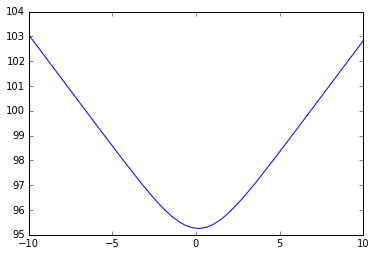

In [7]:
x = np.linspace(-10,10)
y = [f(v) for v in x]
plot(x,y)

In [ ]:
def logistic(x):
    return 1.0/(1+np.exp(-x))
logistic(np.array([0.08588418, -0.74669407]))

In [5]:
theano.tensor.extra_ops.cumprod([2,3,4,5]).tag.test_value

array([  2,   6,  24, 120])